# Homework 2

## Your Name Here (or your names here if you are pair programming)

 - Student Name: Tyler Valdez
 - Student UT EID: trv359


 - Partner Name: N/A
 - Partner UT EID: N/A

## Practicing Pandas


In [2]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

# Social Network Dataset

In this assignment we work with a social network dataset. 

You have 5 tables to work on. 

1. **person_knows_person**
This table represents the friendship between users. A person can have many friends. Persons have unique integer id number. 

2. **person_likes_post_file** 
This tables represents user likes. A person and a post is represented by IDs. 

3. **post_hasCreator_person**
A person creates many posts. Each post has a unique creator person id. 

4. **comment_replyOf_post**
This table represents comments on posts. Both post and comments have unique ids. 

5. **comment_hasCreator_person** 
A user can comment on posts. Each comment has a unique creator person id. 


In [3]:
url = "https://raw.githubusercontent.com/kiat/Elements-of-Data-Analytics/main/datasets/social-media/"

person_knows_person_file = url + "person_knows_person.csv"
person_likes_post_file = url + "person_likes_post.csv"
post_hasCreator_person_file = url + "post_hasCreator_person.csv"
comment_replyOf_post_file = url + "comment_replyOf_post.csv"
comment_hasCreator_person_file = url + "comment_hasCreator_person.csv"

person_knows_person = pd.read_csv(person_knows_person_file,  sep='|')
person_likes_post = pd.read_csv(person_likes_post_file,  sep='|')
post_hasCreator_person = pd.read_csv(post_hasCreator_person_file,  sep='|')
comment_replyOf_post = pd.read_csv(comment_replyOf_post_file, sep='|')
comment_hasCreator_person = pd.read_csv(comment_hasCreator_person_file,  sep='|')

print(person_knows_person.head(5))
print("-------------------------")

print(person_likes_post.head(5))
print("-------------------------")

print(post_hasCreator_person.head(5))
print("-------------------------")

print(comment_replyOf_post.head(5))
print("-------------------------")

print(comment_hasCreator_person.head(5))
print("-------------------------")

   Person.id  Person.id.1
0         38          956
1         38          962
2         38          941
3         38           74
4         38           36
-------------------------
   Person.id  Post.id          creationDate
0         74        0  2012-10-15T05:13:41Z
1         36        0  2012-10-18T10:51:39Z
2        417       10  2012-11-18T11:14:47Z
3        415       10  2012-11-20T06:30:22Z
4        109       10  2012-11-19T11:03:52Z
-------------------------
   Post.id  Person.id
0        0         38
1       10         38
2       20         38
3       30         38
4       40         38
-------------------------
   Comment.id  Post.id
0           0        0
1          10        0
2          30        0
3          70        0
4         100       10
-------------------------
   Comment.id  Person.id
0           0         74
1          10        832
2          20        913
3          30        457
4          40        956
-------------------------


# Question - 1. Who are the top-10 users who have the highest number of friends? (4 points)
Count up the number of friends of each user and provide the top-10 of this number of friend count list. Print out their user IDs. 

In [107]:
df = pd.DataFrame(person_knows_person)
c = df['Person.id'].value_counts(ascending=False).head(10)
print("The top 10 users are ", c.index.astype(str).values.tolist())

The top 10 users are  ['336', '959', '40', '430', '811', '296', '938', '804', '165', '323']


# Question - 2. Who wrote the most liked post?  (4 points)
Count up the number of likes for each post and find out who wrote that post. 
Print out the user id. If there are multiple maximum print them all. 

In [307]:
df = pd.DataFrame(person_likes_post)
df1 = pd.DataFrame(post_hasCreator_person)
df2 = pd.merge(df,df1, on='Post.id')
c = df2['Post.id'].value_counts(ascending=False)
idx = c[c>=9].index
res = df2.loc[df2.index.isin(idx)]
print(res['Person.id_y'].unique())


[ 38 534 941 347 303 495 884 540 336 135 587 863  43 875 139 861 422 285
 514 746  50 548 602 825 402 109 557 790 463 838  65 357  52 766 708 427
 193 707 667 559 629 232 186 197 429  28 732 331 318 635 393 659 189 643
 150 668 556 383 532 326 970 717 900 910 940 598 239 524 384 396 177 795
 262  91 996 473 415 518 842 762 743 764 712  94 945 564 122 959 997  36
 510 275 335 568 221  73 408 118 185  48 759 976  33 609 156 102 333  56
 770 852 486 630 451 729 542 911 430  83 979 896 299 297 394 182 828 882
 878 529  79 819   3 149  78 319 180 683 938 951   5 434 572 760 157 886
 785 490 613 229 445 980 778 709 231 476 491 560  11 715 942 280 736 889
 835 986 287 661 575 276 400 937 834 876 658 464 929 960 325 693 921 694
 143 489 449 983 696 958 167 159 991 767 480 899  21 173 772 166 987 786
 565 366  99 263  71 814 446 745 998 892 648  66 531 504 571  17 716 131
 395 647 420 101 344 908 843 439 682 973  64 753 266 417 841 426 274 570
 191 680 646  41 155 859 125 856 649 913 702  10  4

# Question - 3. Who wrote the most influential post? The most influential post is the most discussed and most liked post. (4 points)

**Tip:** First, count up the number of comments and likes that each post has. Then find out which post it is, and finally find out who wrote that. 
Print out one user id. 
If there is a tie, print out the ***one***  at the tope of the list.


In [84]:
df = pd.DataFrame(person_likes_post)
df1 = pd.DataFrame(comment_replyOf_post)
df2 = pd.DataFrame(post_hasCreator_person)
concated = pd.concat([df['Post.id'],df1['Post.id']])
id = concated.value_counts().head(1)
res = df2.loc[df2['Post.id'] == 1424730]
user_id = res['Person.id']
print(user_id.to_string(index=False))

23


# Question - 4. Create two histograms for the distributions of the number of likes and comments that users have created. (4 points)
Describe the shape of these data two data distributions. 

**Tip:** First perpare two lists of number of likes and number of comments that users have done. You need to count up how many likes and how many comments each unique user id has. 

***The shape of these two data distributions seem both to be skewed to the right. More users have liked or commented on a post >500 times compared to users who have liked or commented on a post greater than 500 times.***

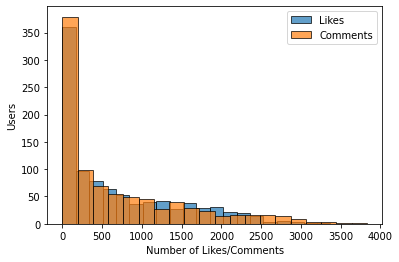

In [322]:
df = pd.DataFrame(person_likes_post)
c = df['Person.id'].value_counts()
like_list = c.astype(int).values.tolist()
df1 = pd.DataFrame(comment_hasCreator_person)
c1 = df1['Person.id'].value_counts()
comment_list = c1.astype(int).values.tolist()
plt.hist(like_list, bins = 20, label='Likes', alpha=.7,edgecolor='black')
plt.hist(comment_list, bins = 20,label='Comments', alpha=0.7, edgecolor='black')
plt.legend()
plt.ylabel("Users")
plt.xlabel("Number of Likes/Comments")
plt.show()

# Question - 5. What is the Pearson correlation coefficient between the number of comments and the number of likes that users do on the social network? (4 points)

Print out one number. 



**Tip:** You can calculate correlation coefficient using the following formula: 
Assume that x and y are two arrays of data, in this case number of likes and comments of each user. n is the number of users. 

**Bonus Tip:** Consider that some users might have liked posts, but not liked any comments, or vice versa.

You can use whichever technique you would like for the question, as long as it has been discussed in lecture.

 


\begin{align*}
r= {{ n(\sum x y ) - (\sum x ) (\sum y)    } \over { \sqrt{ [ n \sum x^2  -
(\sum x)^2 ] [ n\sum y^2 - (\sum y )^2 ] } } }
\end{align*}











In [105]:
df = pd.DataFrame(person_likes_post)
c = df['Person.id'].value_counts()
df1 = pd.DataFrame(comment_hasCreator_person)
c1 = df1['Person.id'].value_counts()
x = c
y = c1
print(x.corr(y))


0.9206550769144274
